In [1]:
import geopandas

In [2]:
import osmnx as ox

In [3]:
from shapely.geometry import Point

In [4]:
G = ox.graph_from_place('Leuven, Belgium', network_type='drive')

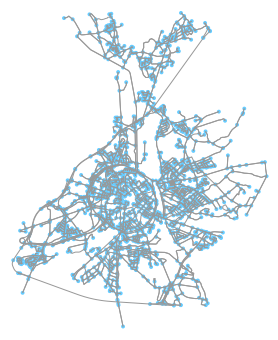

(<Figure size 341.295x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117f5e320>)

In [5]:
ox.plot_graph(ox.project_graph(G))

In [6]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

In [8]:
type(nodes), type(edges)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [9]:
nodes.head()

,highway,osmid,ref,x,y,geometry
5489418242,NaN,5489418242,NaN,4.69747,50.865,POINT (4.6974731 50.8650317)
5489418244,NaN,5489418244,NaN,4.69739,50.8652,POINT (4.6973864 50.8652068)
248181984,NaN,248181984,NaN,4.69763,50.9274,POINT (4.6976289 50.927364)
1051852811,NaN,1051852811,NaN,4.72765,50.8535,POINT (4.7276541 50.8535479)
248181985,NaN,248181985,NaN,4.69777,50.9271,POINT (4.6977734 50.9271146)


In [13]:
nodes_bb = nodes.cx[4.697:4.698, 50.865:50.866]

In [19]:
dists = nodes_bb.distance(Point(4.697, 50.866))
dists.sort_values(inplace=True)
dists

5489418244    0.000882
5489418242    0.001078
dtype: float64

In [10]:
edges.head()

,access,bridge,geometry,highway,junction,key,landuse,lanes,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (4.6974731 50.8650317, 4.6976323 50...",residential,NaN,0,NaN,NaN,24.850,NaN,Zeepweg,False,21845582,NaN,NaN,5489418242,922275349,NaN
1,NaN,NaN,"LINESTRING (4.6974731 50.8650317, 4.6974451 50...",residential,NaN,0,NaN,1,146.200,50,Groenstraat,True,85798768,NaN,NaN,5489418242,5489184097,NaN
2,NaN,NaN,"LINESTRING (4.6973864 50.8652068, 4.6974731 50...",residential,NaN,0,NaN,1,20.399,50,Groenstraat,True,3372474,NaN,NaN,5489418244,5489418242,NaN
3,NaN,yes,"LINESTRING (4.6973864 50.8652068, 4.6979643 50...",residential,NaN,0,NaN,1,204.301,50,Stanislas De Rijcklaan,False,"[19568040, 19568033, 301992140]",NaN,NaN,5489418244,16571291,NaN
4,NaN,NaN,"LINESTRING (4.6976289 50.927364, 4.6977734 50....",residential,NaN,0,NaN,NaN,29.523,NaN,Korte Dolagestraat,False,23018429,NaN,NaN,248181984,248181985,NaN


In [7]:
Gp = ox.project_graph(G)

In [8]:
nodes_proj, edges_proj = ox.graph_to_gdfs(Gp, nodes=True, edges=True)

In [9]:
nodes_proj.head()

,highway,lat,lon,osmid,ref,x,y,geometry
5489418242,NaN,50.865,4.69747,5489418242,NaN,619453,5.63619e+06,POINT (619452.7042072052 5636188.778129064)
5489418244,NaN,50.8652,4.69739,5489418244,NaN,619446,5.63621e+06,POINT (619446.1558890229 5636208.107493646)
248181984,NaN,50.9274,4.69763,248181984,NaN,619304,5.64312e+06,POINT (619304.263779653 5643119.874228007)
1051852811,NaN,50.8535,4.72765,1051852811,NaN,621606,5.63496e+06,POINT (621606.3105628621 5634961.136838078)
248181985,NaN,50.9271,4.69777,248181985,NaN,619315,5.64309e+06,POINT (619315.0563312562 5643092.376500632)


In [10]:
edges_proj.head()

,access,bridge,geometry,highway,junction,key,landuse,lanes,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width
0,NaN,NaN,LINESTRING (619452.7042072052 5636188.77812906...,residential,NaN,0,NaN,NaN,24.850,NaN,Zeepweg,False,21845582,NaN,NaN,5489418242,922275349,NaN
1,NaN,NaN,LINESTRING (619452.7042072052 5636188.77812906...,residential,NaN,0,NaN,1,146.200,50,Groenstraat,True,85798768,NaN,NaN,5489418242,5489184097,NaN
2,NaN,NaN,LINESTRING (619446.1558890229 5636208.10749364...,residential,NaN,0,NaN,1,20.399,50,Groenstraat,True,3372474,NaN,NaN,5489418244,5489418242,NaN
3,NaN,yes,LINESTRING (619446.1558890229 5636208.10749364...,residential,NaN,0,NaN,1,204.301,50,Stanislas De Rijcklaan,False,"[19568040, 19568033, 301992140]",NaN,NaN,5489418244,16571291,NaN
4,NaN,NaN,LINESTRING (619304.263779653 5643119.874228007...,residential,NaN,0,NaN,NaN,29.523,NaN,Korte Dolagestraat,False,23018429,NaN,NaN,248181984,248181985,NaN


In [25]:
cnt = 0
for nid, row in nodes_proj[['x', 'y']].iterrows():
    print(row['x'], row['y'])
    cnt += 1
    if cnt > 5:
        break

619452.7042072052 5636188.778129064
619446.1558890229 5636208.107493646
619304.263779653 5643119.874228007
621606.3105628621 5634961.136838078
619315.0563312562 5643092.376500632
621436.6238024724 5635000.213485507


In [26]:
cnt = 0
for nid, row in edges_proj[['u', 'v']].iterrows():
    print(row)
    cnt += 1
    if cnt > 5:
        break

u    5489418242
v     922275349
Name: 0, dtype: int64
u    5489418242
v    5489184097
Name: 1, dtype: int64
u    5489418244
v    5489418242
Name: 2, dtype: int64
u    5489418244
v      16571291
Name: 3, dtype: int64
u    248181984
v    248181985
Name: 4, dtype: int64
u    1051852811
v    1051852856
Name: 5, dtype: int64


## Dataframe

In [6]:
nodes.crs = {'init': 'epsg:4326'}

In [8]:
nodes.head()

,highway,osmid,ref,x,y,geometry
5489418242,NaN,5489418242,NaN,4.69747,50.865,POINT (4.6974731 50.8650317)
5489418244,NaN,5489418244,NaN,4.69739,50.8652,POINT (4.6973864 50.8652068)
248181984,NaN,248181984,NaN,4.69763,50.9274,POINT (4.6976289 50.927364)
1051852811,NaN,1051852811,NaN,4.72765,50.8535,POINT (4.7276541 50.8535479)
248181985,NaN,248181985,NaN,4.69777,50.9271,POINT (4.6977734 50.9271146)


In [7]:
nodes_proj = nodes.to_crs({'init': 'epsg:3395'})
nodes_proj.head()

,highway,osmid,ref,x,y,geometry
5489418242,NaN,5489418242,NaN,4.69747,50.865,POINT (522920.3135071002 6564290.522375263)
5489418244,NaN,5489418244,NaN,4.69739,50.8652,POINT (522910.6621072484 6564321.323152874)
248181984,NaN,248181984,NaN,4.69763,50.9274,POINT (522937.6570837658 6575262.375743711)
1051852811,NaN,1051852811,NaN,4.72765,50.8535,POINT (526280.047058732 6562270.730740776)
248181985,NaN,248181985,NaN,4.69777,50.9271,POINT (522953.7427501855 6575218.446432007)


In [18]:
pt = nodes_proj.iloc[0].geometry

In [17]:
str(pt)

'POINT (522920.3135071002 6564290.522375263)'

In [19]:
pt.x

522920.3135071002

In [25]:
nodes.iloc[:3].apply(lambda row: (row['geometry'].x, row['geometry'].y), axis=1)

5489418242    (4.6974731, 50.8650317)
5489418244    (4.6973864, 50.8652068)
248181984      (4.6976289, 50.927364)
dtype: object

In [26]:
nodes_proj.cx?

Type:        property
String form: <property object at 0x107375098>
Docstring:  
Coordinate based indexer to select by intersection with bounding box.

Format of input should be ``.cx[xmin:xmax, ymin:ymax]``. Any of ``xmin``,
``xmax``, ``ymin``, and ``ymax`` can be provided, but input must
include a comma separating x and y slices. That is, ``.cx[:, :]`` will
return the full series/frame, but ``.cx[:]`` is not implemented.


In [31]:
dists = nodes_proj.iloc[:5].distance(Point(522920.3135071002, 6564290.522375263))
dists

5489418242        0.000000
5489418244       32.277506
248181984     10971.867076
1051852811     3920.123440
248181985     10927.975188
dtype: float64

In [36]:
dists.sort_values(inplace=True)

In [40]:
for label, row in dists.items():
    print(row)

0.0
32.277506417064835
3920.1234399829855
10927.97518775834
10971.867076226239


## Read gpx

In [27]:
import fiona

In [40]:
track_data = fiona.open("Leuven Stadswandeling - 5 km TR.gpx", layer='tracks')

In [41]:
track_data

<open Collection 'Leuven Stadswandeling - 5 km TR.gpx:tracks', mode 'r' at 0x12390ed68>

In [42]:
track = track_data[0]['geometry']['coordinates'][0]
track[:5]

[(4.699974, 50.879428),
 (4.700002, 50.879428),
 (4.700429, 50.879302),
 (4.700315, 50.879105),
 (4.700344, 50.879105)]

In [49]:
nodes.project?

Signature: nodes.project(other, normalized=False)
Docstring:
Return the distance along each geometry nearest to *other*

Parameters
----------
other : BaseGeometry or GeoSeries
    The *other* geometry to computed projected point from.
normalized : boolean
    If normalized is True, return the distance normalized to
    the length of the object.

The project method is the inverse of interpolate.
File:      /usr/local/lib/python3.6/site-packages/geopandas/base.py
Type:      method
